In [1]:
!pip install hstrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 7.0 MB/s eta 0:00:00


In [2]:
from hstrader import HsTrader
from hstrader.models import Event, Tick, Order, CrtOrder, OrderType, SideType, Status, Position, Resolution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import os

In [73]:
CLIENT_ID = "Your Client ID"
CLIENT_SECRET = "Your Client Secret"

client = HsTrader(CLIENT_ID, CLIENT_SECRET)

In [89]:
# HsTrader symbol
symbol = client.get_symbol("Ethereum")
# HsTrader market data
data = client.get_market_history(symbol, resolution=Resolution.D1, count_back=1000)

In [90]:

df = pd.DataFrame([historytick.dict() for historytick in data])
print(df)

                         time        open        high         low       close  \
0   2024-04-30 23:59:00+00:00     0.04915     0.04974     0.04601     0.04959   
1   2024-05-01 00:00:00+00:00     0.04959     0.05137     0.04500     0.05098   
2   2024-05-02 00:00:00+00:00     0.05098     0.05151     0.04851     0.05055   
3   2024-05-03 00:00:00+00:00     0.05055     0.05073     0.04705     0.04926   
4   2024-05-04 00:00:00+00:00     0.04926     0.04969     0.04662     0.04879   
..                        ...         ...         ...         ...         ...   
110 2024-08-19 00:00:00+00:00  2370.20000  2400.57000  2321.47000  2364.91000   
111 2024-08-20 00:00:00+00:00  2364.91000  2414.21000  2309.56000  2338.06000   
112 2024-08-21 00:00:00+00:00  2338.06000  2383.99000  2287.04000  2358.33000   
113 2024-08-22 00:00:00+00:00  2358.33000  2374.32000  2320.37000  2360.19000   
114 2024-08-23 00:00:00+00:00  2360.19000  2413.56000  2358.73000  2387.09000   

           volume  
0    2.

In [91]:
df['time'] = pd.to_datetime(df['time']).dt.date
df.head()

,time,open,high,low,close,volume
0,2024-04-30,0.04915,0.04974,0.04601,0.04959,2.851935e+06
1,2024-05-01,0.04959,0.05137,0.04500,0.05098,6.280320e+06
2,2024-05-02,0.05098,0.05151,0.04851,0.05055,6.180492e+06
3,2024-05-03,0.05055,0.05073,0.04705,0.04926,5.928385e+06
4,2024-05-04,0.04926,0.04969,0.04662,0.04879,5.608346e+06


In [92]:

def calculate_moving_average(data, window_size = 20):
    """
    Calculate the moving average for the 'close' column of the dataset.

    :param data: pd.DataFrame, dataset containing 'time', 'open', 'high', 'low', 'close', 'volume' columns
    :param window_size: int, the window size for the moving average
    :return: pd.DataFrame, original dataset with an additional 'moving_average' column
    """
    data['std c'] = data['close'].rolling(window=window_size).std()
    data['std o'] = data['open'].rolling(window=window_size).std()

    return data


result = calculate_moving_average(df, 20)
print(result)

           time        open        high         low       close        volume  \
0    2024-04-30     0.04915     0.04974     0.04601     0.04959  2.851935e+06   
1    2024-05-01     0.04959     0.05137     0.04500     0.05098  6.280320e+06   
2    2024-05-02     0.05098     0.05151     0.04851     0.05055  6.180492e+06   
3    2024-05-03     0.05055     0.05073     0.04705     0.04926  5.928385e+06   
4    2024-05-04     0.04926     0.04969     0.04662     0.04879  5.608346e+06   
..          ...         ...         ...         ...         ...           ...   
110  2024-08-19  2370.20000  2400.57000  2321.47000  2364.91000  6.268304e+06   
111  2024-08-20  2364.91000  2414.21000  2309.56000  2338.06000  2.516209e+06   
112  2024-08-21  2338.06000  2383.99000  2287.04000  2358.33000  5.042115e+06   
113  2024-08-22  2358.33000  2374.32000  2320.37000  2360.19000  6.398493e+06   
114  2024-08-23  2360.19000  2413.56000  2358.73000  2387.09000  3.280023e+06   

          std c       std o

In [94]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Candlestick(
    x=df['time'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='Candlestick'
))

fig.add_trace(go.Scatter(
    x=df['time'],
    y=df['std c'],
    mode='lines',
    line=dict(color='red', width=2),
    name='Standard deviation close'
))

fig.add_trace(go.Scatter(
    x=df['time'],
    y=df['std o'],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Standard deviation open'
))

fig.update_layout(
    title='Candlestick Chart with Standard Deviation',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template='plotly_white'
)

fig.show()

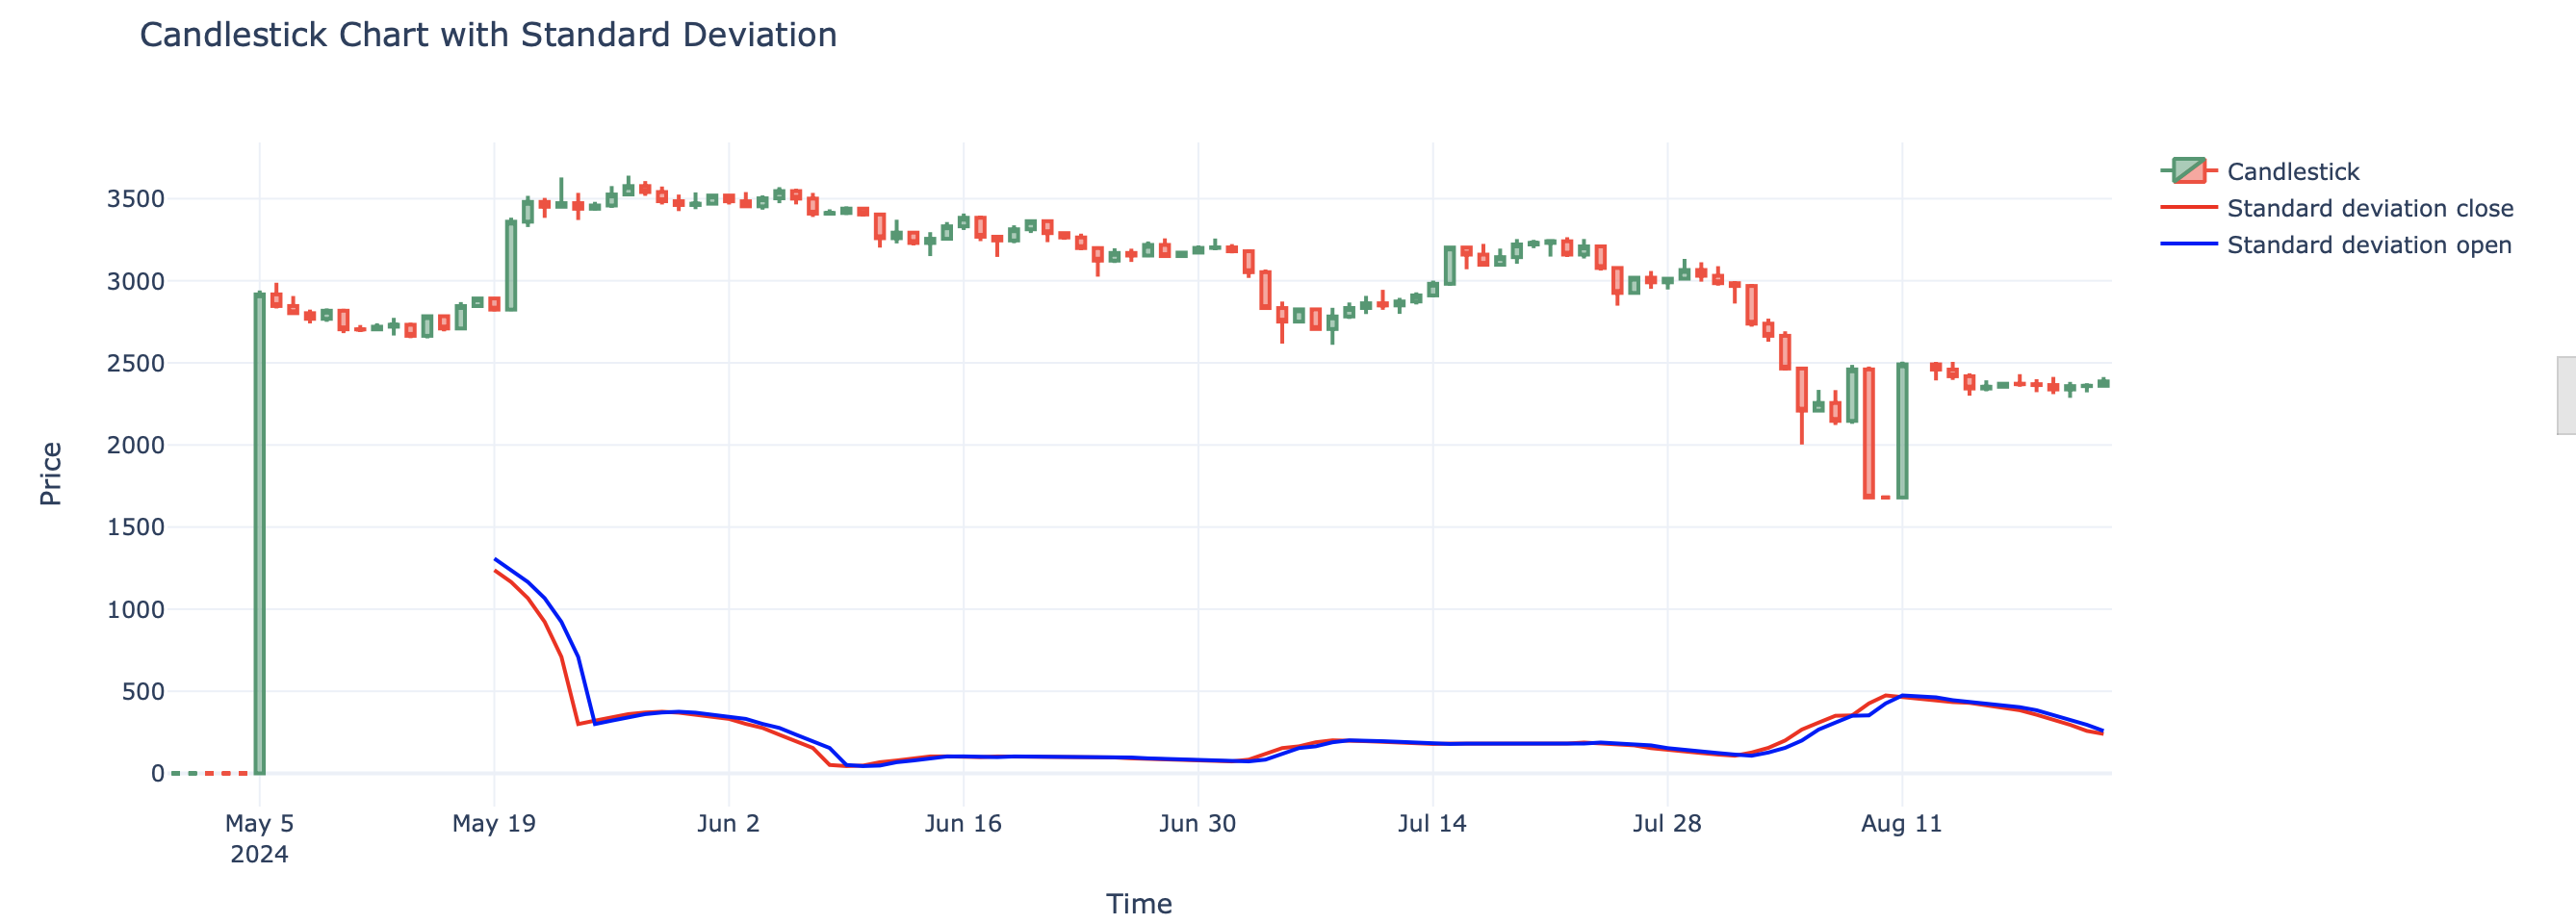

In [95]:
from IPython.display import Image
Image('VIS.png')

Plotting real time data

In [96]:
import os
import logging
import asyncio
import pandas as pd
import plotly.graph_objects as go
from datetime import timedelta
from hstrader import HsTrader
from hstrader.models import Tick, Event, Resolution
from IPython.display import display, clear_output
import nest_asyncio

In [97]:
client = HsTrader(CLIENT_ID, CLIENT_SECRET)

In [98]:
def calculate_std(df, window):
    """
    df (DataFrame): DataFrame containing OHLC price data.
    window (int): The window size for the moving average.

    Returns:
    DataFrame: A DataFrame with the moving average of the open and close prices.
    """
    df['open_std'] = df['open'].rolling(window).std()
    df['close_std'] = df['close'].rolling(window).std()
    return df

In [99]:
def Plot_std(df, fig):
    """
        df (DataFrame): DataFrame containing OHLC price data along with 'open_ma' and 'close_ma' for moving averages.
        fig (plotly.graph_objs.Figure): The Plotly figure to which the moving averages will be added.
    """

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        name='Candlestick'
    ))

    # Add moving average for Open price
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['open_std'],
        mode='lines',
        line=dict(color='blue', width=1.5),
        name='Open STD'
    ))

    # Add moving average for Close price
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['close_std'],
        mode='lines',
        line=dict(color='red', width=1.5),
        name='Close STD'
    ))

    # Update layout
    fig.update_layout(
        title='Standard Deviation on Candlestick Chart',
        xaxis_title='Date',
        yaxis_title='Price',
        xaxis_rangeslider_visible=False,
        template='plotly_white',
        legend=dict(
            title='Indicators',
            orientation='h',
            yanchor='bottom',
            y=1.1,
            xanchor='right',
            x=1
        ),
        margin=dict(t=150)
    )

In [100]:
# Retrieve market data for any forex symbol by specifying its name in the get_symbol function
symbol = client.get_symbol('Ethereum')
data = client.get_market_history(symbol=symbol.id, resolution=Resolution.M1)

# Create a DataFrame from the retrieved data
df = pd.DataFrame([bar.model_dump() for bar in data])
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [101]:
fig = go.FigureWidget()
candlestick = go.Candlestick(x=df.index, open=df['open'], high=df['high'], low=df['low'], close=df['close'], name='Candlestick')
fig.add_trace(candlestick)


df = calculate_std(df, 7)
Plot_std(df, fig)

In [102]:
# Prepare data dictionary
CANDLE_INTERVAL = timedelta(minutes=1)
data = {
    'x': list(df.index),
    'open': list(df['open']),
    'high': list(df['high']),
    'low': list(df['low']),
    'close': list(df['close'])
}

In [103]:
@client.subscribe(Event.MARKET)
async def on_market(tick: Tick):
    global data, df

    try:
        if tick.symbol_id == symbol.id:
            tick_time = pd.to_datetime(tick.time)
            if not data['x']:
                data['x'].append(tick_time)
                data['open'].append(tick.bid)
                data['high'].append(tick.bid)
                data['low'].append(tick.bid)
                data['close'].append(tick.bid)
            elif tick_time >= data['x'][-1] + CANDLE_INTERVAL:
                data['x'].append(tick_time)
                data['open'].append(data['close'][-1])
                data['high'].append(tick.bid)
                data['low'].append(tick.bid)
                data['close'].append(tick.bid)
            else:
                data['low'][-1] = min(tick.bid, data['low'][-1])
                data['high'][-1] = max(tick.bid, data['high'][-1])
                data['close'][-1] = tick.bid

            df = pd.DataFrame({
                'time': data['x'],
                'open': data['open'],
                'high': data['high'],
                'low': data['low'],
                'close': data['close']
            }).set_index('time')

            # Calculate moving averages (for example, 10-period MA)
            df['open_std'] = df['open'].rolling(window=10).std()
            df['close_std'] = df['close'].rolling(window=10).std()

    except Exception as e:
        logging.error(f"Error in on_market: {e}")
        await client.refresh_token()

async def update_plot():
    global data, df
    while True:
        await asyncio.sleep(1)
        clear_output(wait=True)
        new_fig = go.Figure()

        # Add the candlestick chart
        new_fig.add_trace(go.Candlestick(x=df.index, open=df['open'], high=df['high'], low=df['low'], close=df['close'], name='Candlestick'))

        # Plot moving averages
        Plot_std(df, new_fig)

        display(new_fig)

In [104]:
nest_asyncio.apply()

# Ensure the event loop is running
loop = asyncio.get_event_loop()

# Run both the client and update_plot concurrently
loop.run_until_complete(
    asyncio.gather(
        client.start_async(),
        update_plot()
    )
)

KeyboardInterrupt: 